<a href="https://colab.research.google.com/github/wconstab/algo/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

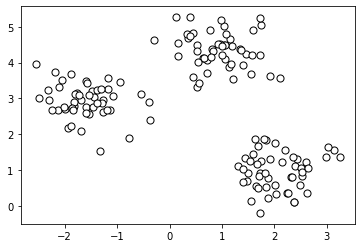

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [0]:

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

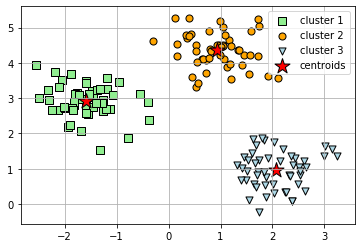

In [4]:

# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Now for my own version.

1. randomly pick K centroids from the data.
2. compute euclidean distances from each datum to each centroid, assign centroid
3. compute mean of each cluster and delta of each centroid
4. iterate while delta above threshold


4 iterations to convergence, error 0.0


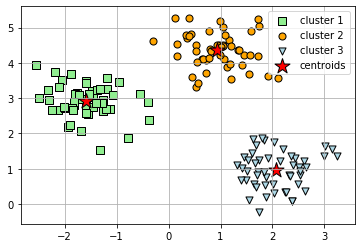

In [53]:
import random
import math
import numpy as np

def dist(A, B):
  return math.sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2)

def k_means_innerloop(k, centroids):
  distances = np.empty((len(X), k))
  clusters = np.zeros((k, 3))
  for i, point in enumerate(X):
    for j, c in enumerate(centroids):
      distances[i,j] = dist(point, c)
    cluster = np.argmin(distances[i,:])
    clusters[cluster, 0] += point[0]
    clusters[cluster, 1] += point[1]
    clusters[cluster, 2] += 1
  error = 0.
  for j in range(len(clusters)):
    clusters[j, 0] /= clusters[j, 2]
    clusters[j, 1] /= clusters[j, 2]
    error += dist(clusters[j, 0:2], centroids[j])
  return clusters, error


k = 3
error = float('inf')
thresh = 1e-2
max_iter = 10
clusters = random.choices(X, k=k)
iters = 0
while error > thresh and iters < max_iter:
  new_clusters, error = k_means_innerloop(k, clusters)
  clusters = new_clusters[:, 0:2]
  iters += 1

print("{} iterations to convergence, error {}".format(iters, error))


# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    clusters[:, 0], clusters[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()